## Categorical data, advanced indexing and deling with Not-a-Number data in Numpy.

### Before we start, let's quickly see a Python data structure called dictionary, which will help understand some of the materials and is also useful to understand how XArray works later on.

#### A dictionary represents a map between values that can be of different types. For example:

In [32]:
d = {1: 'one', 2: 'two', 3: 'tree'}

print(d[1], " + ", d[2], " = ", d[3])

one  +  two  =  tree


#### Elements in a dictionary can be modified or new elements added by doing:

In [33]:
d[3] = 'three'
d[4] = 'four'

d

{1: 'one', 2: 'two', 3: 'three', 4: 'four'}

### Categorical data

#### First let's import some libraries:

In [34]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

#### Sometimes remote sensing data contains categorical data as a way of representing groups of individual pixels. 

#### As an example, the following cell simulates a very simple satellite image with three different kind of land cover types. Value `1` represents area covered with grass, `2` croplands and `3` city.

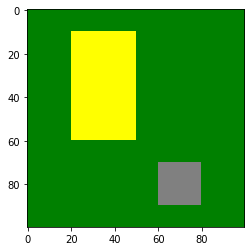

In [35]:
# grass = 1
area = np.ones((100,100))

# crops = 2
area[10:60,20:50] = 2

# city = 3
area[70:90,60:80] = 3

# We map the values to colours
index = {1: 'green', 2: 'yellow', 3: 'grey'}

# Create a discrete colour map
cmap = colors.ListedColormap(index.values())

# Plot
plt.imshow(area, cmap=cmap)

#### The harvesting season has arrived and our cropping lands have changed colour to brown.

#### Can you add a new entry to the `index` dictionary mapping number `4` to the value `brown` and regenerate the colourmap? Then using your new indexing skills can you modify the yellow area to contain the new value `4`. Finally plot again using the same function to show the change in the season.

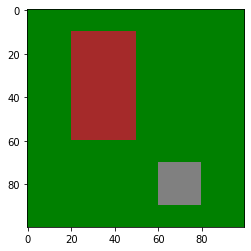

In [24]:
### Your code goes here

index[4] = 'brown'
cmap = colors.ListedColormap(index.values())
area[area==2] = 4
plt.imshow(area, cmap=cmap)

#### Masking out regions is a very common practice in remote sensing analysis. For example the following image reprensents a satellite image of a region in which there are clouds, shadows and some water.

<img src="data/land_mask.png" alt="drawing" width="220" align="left"/>

#### We have three files, containing numpy arrays `.npy` which represent the mask for each category:

#### These masks are stored as `dtype=uint8` using `1` to indicate presence and `0` for absence of each feature.

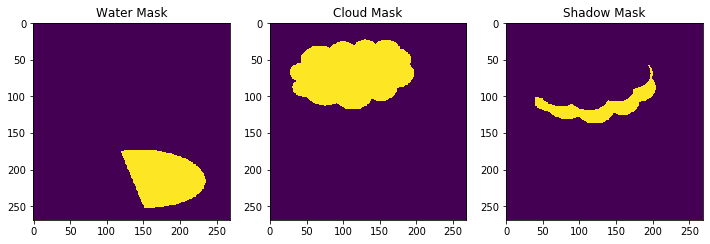

In [25]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,3) # set up a 2 x 2 grid of 4 images for better presentation

ax1=plt.subplot(gs[0,0])
water_mask = np.load("data/water_mask.npy")
plt.imshow(water_mask)
ax1.set_title('Water Mask')

ax2=plt.subplot(gs[0,1])
cloud_mask = np.load("data/cloud_mask.npy")

plt.imshow(cloud_mask)
ax2.set_title('Cloud Mask')

ax3=plt.subplot(gs[0,2])
shadow_mask = np.load("data/shadow_mask.npy")
plt.imshow(shadow_mask)
ax3.set_title('Shadow Mask')

plt.show()

#### Let's load the RGB image, which is a 3-dimensional array of type `uint8` with the 3rd dimension corresponding to the colour bands.

#### Can you use the previous masks to filter clouds, shadows and water out of the image? _Hint: Use your new boolean indexing skills and assign pixels in these regions the value 0_

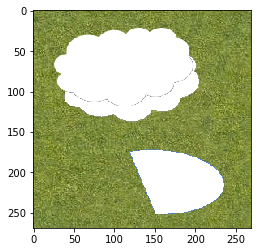

In [36]:
import imageio

im = imageio.imread('data/land_mask.png')

## Your code here
im[cloud_mask==1] = 0
im[shadow_mask==1] = 0
im[water_mask==1] = 0

plt.imshow(im)

## Bit Flags

#### Some remote sensing products contain ancillary data describing the quality of each pixel. This quality information is normally encoded using bit flags, in which each bit in a number acts as an 'on/off' switch for a particular feature.

#### For example, a uint8 number is represented in binary format using 8 bits, so it can be used to encode up to 8 different features.

* Bit 0: Cloud  
`00000001` -> 1
* Bit 1: Terrain oclussion  
`00000010` -> 2
* Bit 3: Saturation  
`00001000` -> 8

#### So, if one pixel is both classified as cloud and is saturated, the pixel quality mask would be:
`00001001` -> 9


#### This is the description of the pixel quality mask of Landsat 8

<img src="data/ls8_pq.png" alt="drawing" width="220" align="left"/>

#### And this is a real example of a pixel quality Landsat 8 image over Margaret River encoded using the previous bit flags.

(7761, 7711) uint16


array([   1, 2720, 2724, 2752, 2800, 2976, 3008, 3744, 3776, 6816, 6896],
      dtype=uint16)

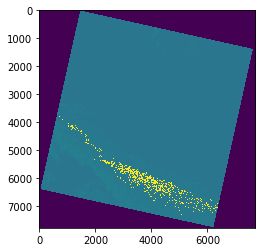

In [37]:
import rasterio

pq = rasterio.open('data/LC08_L1TP_112084_20190820_20190902_01_T1_BQA.tiff').read()[0,:,:]

print(pq.shape, pq.dtype)
plt.imshow(pq)

# This function displays unique values in the PQ mask
np.unique(pq)

#### For the value `2720` we can see the binary representation doing:

In [28]:
"{:016b}".format(2720)

'0000101010100000'

#### Can you work out what is the interpretation of the `2800` value in the PQ mask?

## Analysing data with NaNs. 

#### NaN is a special value of `float32` and `float64` arrays used to designate Not-a-Number values.

In [5]:
arr = np.array([1,2,3,4,5,np.nan,7,8,9], dtype=np.float32)

arr

array([ 1.,  2.,  3.,  4.,  5., nan,  7.,  8.,  9.], dtype=float32)

#### To compute statistics on arrays containing NaN values, Numpy has special versions of common functions such as `mean` or `std` that ignore the NaN values:

In [9]:
print(np.mean(arr))

print(np.nanmean(arr))

nan
4.875


#### Consider the following uint16 array in which the value `0` designates no data. If we want to compute the mean of all the valid values, we can do converting the array to float type and then assigning the value `0` to NaN.

In [11]:
arr = np.array([234,243,0,231,219,0,228,220,237], dtype=np.uint16)
arr = arr.astype(np.float32)
arr[arr==0]=np.nan

np.nanmean(arr)

230.28572

#### **Exercise**: Can you calculate the mean value of each of the RGB channels for just the area covered with grass in the following image?

<img src="data/land_mask.png" alt="drawing" width="220" align="left"/>

In [40]:
import imageio

im = imageio.imread('data/land_mask.png')[:,:,:3]

print(im.shape)

### Red is im[:,:,0], Green is im[:,:,1], Blue is im[:,:,2]
### You code here

(269, 269, 3)
